# **Tutorial: Linear Regression**

**Example 1**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import the tensorflow and other libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import matplotlib
import matplotlib.pyplot as plt

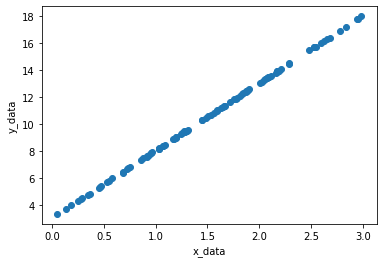

In [4]:
# Training and Testing Data
r = np.random.RandomState(123)
x_data = 3 * r.rand(100)
y_data = 5 * x_data + 3 + 0.1 * r.rand(100) # w_1 = 5, w_0 = 3
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
plt.scatter(x_data, y_data) 
plt.xlabel("x_data")
plt.ylabel("y_data") 
plt.show()

In [5]:
# Gradient-descent solution
# Ref: 1) tf.keras.layers.Normalization: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization; and 2) tf.keras.layers.Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = models.Sequential()
model.add(layers.Normalization(input_shape=(1,), axis=None))
model.add(layers.Dense(1))  #dense layer, 1 has miltiple nodes, at least 1 node
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=2000, 
                    validation_data=(x_test, y_test))

Epoch 1/2000
3/3 [==============================] - 3s 86ms/step - loss: 12.8013 - mean_absolute_error: 12.8013 - val_loss: 12.2736 - val_mean_absolute_error: 12.2736
Epoch 2/2000
3/3 [==============================] - 0s 11ms/step - loss: 12.7938 - mean_absolute_error: 12.7938 - val_loss: 12.2662 - val_mean_absolute_error: 12.2662
Epoch 3/2000
3/3 [==============================] - 0s 11ms/step - loss: 12.7861 - mean_absolute_error: 12.7861 - val_loss: 12.2589 - val_mean_absolute_error: 12.2589
Epoch 4/2000
3/3 [==============================] - 0s 11ms/step - loss: 12.7785 - mean_absolute_error: 12.7785 - val_loss: 12.2516 - val_mean_absolute_error: 12.2516
Epoch 5/2000
3/3 [==============================] - 0s 11ms/step - loss: 12.7710 - mean_absolute_error: 12.7710 - val_loss: 12.2442 - val_mean_absolute_error: 12.2442
Epoch 6/2000
3/3 [==============================] - 0s 11ms/step - loss: 12.7634 - mean_absolute_error: 12.7634 - val_loss: 12.2369 - val_mean_absolute_error: 12.236

In [6]:
# Print weight w_1 and bias w_0
W = model.layers[1].get_weights()
print(W)


[array([[0.60639846]], dtype=float32), array([0.], dtype=float32)]


1/1 - 0s - loss: 0.4073 - mean_absolute_error: 0.4073 - 15ms/epoch - 15ms/step
0.4073440432548523


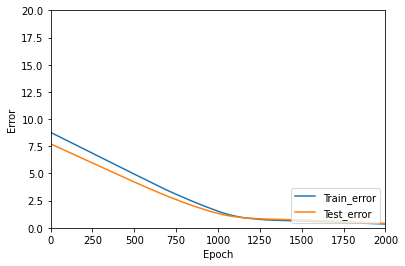

In [ ]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

**Example 2**

In [ ]:
# Training and Testing Data | y = 3 + 5x_1 + 6x_2 + r
r = np.random.RandomState(123)
x_data = 3 * r.rand(100,2)
y_data = 3 + 5 * x_data[:,0] + 6 * x_data[:,1] + 0.1 * r.rand(100) # [w_1,w_2] = [5,6], w_0 = 3
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Gradient-descent solution
model = models.Sequential()
model.add(layers.Normalization(input_shape=(2,), axis=None))  #2 becasue 2 Xs
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 6
Trainable params: 3
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=3500, 
                    validation_data=(x_test, y_test))

1/1 - 0s - loss: 0.0289 - mean_absolute_error: 0.0289 - 23ms/epoch - 23ms/step
0.028853416442871094


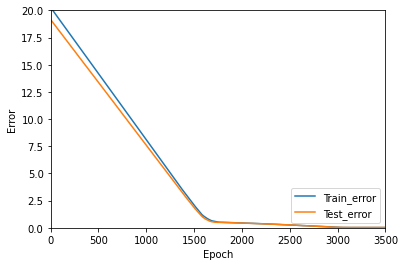

In [ ]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 3500])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

In [ ]:
# Print weight [w_1, w_2] and bias w_0
W = model.layers[1].get_weights()
print(W)

[array([[4.9888124],
       [6.002602 ]], dtype=float32), array([3.0590546], dtype=float32)]
